<a href="https://colab.research.google.com/github/DevpriyaSaini/ML-100/blob/main/Adaboost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from mlxtend.plotting import plot_decision_regions

In [2]:
df=pd.DataFrame()

In [3]:
df['x1']=[1,2,3,4,5,6,6,7,9,9]
df['x2']=[5,3,6,8,1,9,5,8,9,2]
df['label']=[1,1,0,1,0,1,0,1,0,0]

In [4]:
df

,x1,x2,label
0,1,5,1
1,2,3,1
2,3,6,0
3,4,8,1
4,5,1,0
5,6,9,1
6,6,5,0
7,7,8,1
8,9,9,0
9,9,2,0


<Axes: xlabel='x1', ylabel='x2'>

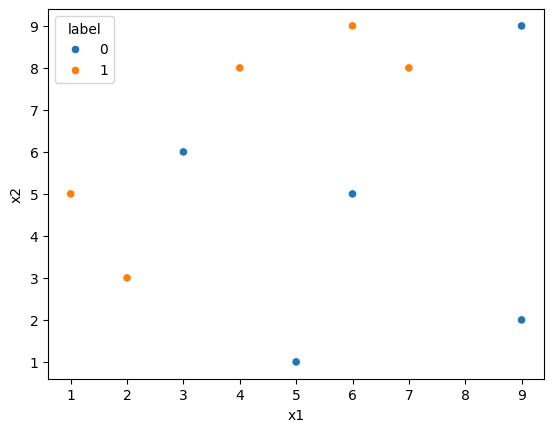

In [5]:
import seaborn as sns
sns.scatterplot(data=df,x='x1',y='x2',hue='label')

In [6]:
df['weight']=1/df.shape[0]

In [7]:
df


,x1,x2,label,weight
0,1,5,1,0.1
1,2,3,1,0.1
2,3,6,0,0.1
3,4,8,1,0.1
4,5,1,0,0.1
5,6,9,1,0.1
6,6,5,0,0.1
7,7,8,1,0.1
8,9,9,0,0.1
9,9,2,0,0.1


In [8]:
from sklearn.tree import DecisionTreeClassifier

In [9]:
dt1=DecisionTreeClassifier(max_depth=1)

In [10]:
x=df[['x1','x2']]
y=df['label']

In [11]:
dt1.fit(x,y)

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'x[1] <= 2.5\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'gini = 0.469\nsamples = 8\nvalue = [3, 5]'),
 Text(0.625, 0.5, '  False')]

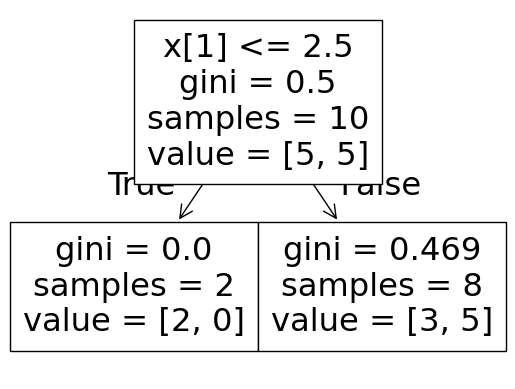

In [12]:

from sklearn.tree import plot_tree
plot_tree(dt1)

In [13]:
df['y_pred']=dt1.predict(x)

In [14]:
df

,x1,x2,label,weight,y_pred
0,1,5,1,0.1,1
1,2,3,1,0.1,1
2,3,6,0,0.1,1
3,4,8,1,0.1,1
4,5,1,0,0.1,0
5,6,9,1,0.1,1
6,6,5,0,0.1,1
7,7,8,1,0.1,1
8,9,9,0,0.1,1
9,9,2,0,0.1,0


In [15]:
def calculate_model_weight(error):
  return 0.5*np.log((1-error)/(error))

In [16]:
alpha1=calculate_model_weight(0.3)

In [17]:
alpha1

np.float64(0.42364893019360184)

In [18]:
def update_row_weight(row,aplha=0.432):
  if row['label']==row['y_pred']:
    return row['weight']*np.exp(-aplha)
  else:
    return row['weight']*np.exp(aplha)

In [19]:
df['updated_weight']=df.apply(update_row_weight,axis=1)

In [20]:
df

,x1,x2,label,weight,y_pred,updated_weight
0,1,5,1,0.1,1,0.064921
1,2,3,1,0.1,1,0.064921
2,3,6,0,0.1,1,0.154034
3,4,8,1,0.1,1,0.064921
4,5,1,0,0.1,0,0.064921
5,6,9,1,0.1,1,0.064921
6,6,5,0,0.1,1,0.154034
7,7,8,1,0.1,1,0.064921
8,9,9,0,0.1,1,0.154034
9,9,2,0,0.1,0,0.064921


In [21]:
df['normalized_weight']=df['updated_weight']/df['updated_weight'].sum()

In [22]:
df['cumsum_upper']=np.cumsum(df['normalized_weight'])

In [24]:
df['cumsum_lower']=df['cumsum_upper']-df['normalized_weight']

In [25]:
df

,x1,x2,label,weight,y_pred,updated_weight,normalized_weight,cumsum_upper,cumsum_lower
0,1,5,1,0.1,1,0.064921,0.070832,0.070832,0.000000
1,2,3,1,0.1,1,0.064921,0.070832,0.141664,0.070832
2,3,6,0,0.1,1,0.154034,0.168058,0.309723,0.141664
3,4,8,1,0.1,1,0.064921,0.070832,0.380555,0.309723
4,5,1,0,0.1,0,0.064921,0.070832,0.451387,0.380555
5,6,9,1,0.1,1,0.064921,0.070832,0.522219,0.451387
6,6,5,0,0.1,1,0.154034,0.168058,0.690277,0.522219
7,7,8,1,0.1,1,0.064921,0.070832,0.761109,0.690277
8,9,9,0,0.1,1,0.154034,0.168058,0.929168,0.761109
9,9,2,0,0.1,0,0.064921,0.070832,1.000000,0.929168


In [29]:
def create_new_dataset(df):
  indices=[]
  for i in range(df.shape[0]):
    a=np.random.random()
    for index,row in df.iterrows():
      if a>=row['cumsum_lower'] and a<=row['cumsum_upper']:
        indices.append(index)
  return indices


In [30]:
index_values=create_new_dataset(df)

In [31]:

index_values

[8, 1, 8, 8, 1, 0, 7, 2, 7, 6]

In [32]:
second_df=df.iloc[index_values,[0,1,2,3]]

In [33]:
second_df

,x1,x2,label,weight
8,9,9,0,0.1
1,2,3,1,0.1
8,9,9,0,0.1
8,9,9,0,0.1
1,2,3,1,0.1
0,1,5,1,0.1
7,7,8,1,0.1
2,3,6,0,0.1
7,7,8,1,0.1
6,6,5,0,0.1


In [34]:
from sklearn.tree import DecisionTreeClassifier
dt2=DecisionTreeClassifier(max_depth=1)

In [35]:
x=second_df[['x1','x2']]
y=second_df['label']

In [37]:
dt2.fit(x,y)

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'x[1] <= 8.5\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(0.25, 0.25, 'gini = 0.408\nsamples = 7\nvalue = [2, 5]'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.625, 0.5, '  False')]

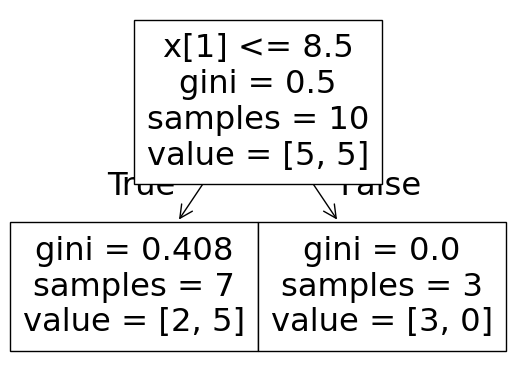

In [38]:
plot_tree(dt2)